In [1]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

import pandas as pd
import matplotlib.pyplot as plt

### Vamos a crear un dataser con la función make_blobs

In [2]:
x, y = make_blobs(n_samples=400, random_state=0)

In [5]:
df = pd.DataFrame(x)

In [6]:
df.describe()

,0,1
count,400.000000,400.000000
mean,0.407203,2.650954
std,1.784549,1.732440
min,-3.891078,-1.842014
25%,-1.052689,1.251689
50%,0.551884,2.749155
75%,1.767472,4.009604
max,4.751492,6.254563


### Vamos a trabajar con KMeans

In [7]:
k_means_model = KMeans()

In [8]:
k_means_model.fit(df)

KMeans()

### Conozcamos los valores que arroja KMeans

In [9]:
# Veamos como funcional el atributo labels
k_means_model.labels_

array([7, 7, 6, 0, 5, 4, 4, 3, 3, 1, 5, 7, 6, 7, 5, 5, 4, 1, 5, 4, 3, 7,
       5, 3, 3, 1, 3, 1, 5, 0, 4, 6, 5, 4, 7, 4, 0, 6, 1, 3, 2, 4, 4, 6,
       5, 5, 6, 2, 0, 7, 7, 5, 1, 6, 1, 5, 3, 6, 7, 4, 6, 6, 2, 4, 7, 3,
       1, 2, 5, 6, 4, 4, 7, 7, 0, 6, 1, 0, 1, 6, 4, 3, 1, 2, 4, 5, 3, 6,
       4, 0, 5, 6, 2, 7, 6, 0, 6, 7, 7, 6, 1, 2, 4, 7, 4, 5, 4, 4, 7, 2,
       1, 2, 3, 7, 6, 6, 5, 6, 7, 6, 1, 0, 4, 4, 5, 2, 1, 4, 1, 1, 3, 0,
       1, 2, 6, 3, 4, 5, 3, 2, 6, 1, 3, 0, 4, 3, 1, 1, 6, 1, 6, 3, 3, 5,
       7, 3, 1, 6, 2, 3, 3, 1, 2, 2, 7, 4, 2, 3, 3, 4, 1, 2, 0, 4, 5, 7,
       5, 2, 3, 3, 1, 1, 0, 6, 2, 0, 5, 3, 4, 3, 3, 1, 4, 0, 0, 3, 0, 1,
       2, 5, 4, 7, 5, 3, 3, 0, 4, 4, 2, 5, 0, 7, 0, 3, 4, 5, 7, 2, 1, 1,
       4, 6, 0, 7, 5, 6, 0, 0, 3, 5, 4, 3, 4, 1, 0, 7, 6, 2, 4, 4, 3, 5,
       6, 4, 1, 1, 1, 5, 1, 3, 0, 1, 5, 7, 1, 6, 1, 7, 0, 4, 1, 2, 7, 6,
       0, 0, 5, 5, 5, 0, 5, 6, 7, 5, 2, 0, 1, 4, 3, 1, 4, 3, 3, 3, 1, 5,
       5, 5, 1, 4, 5, 4, 1, 5, 1, 5, 5, 1, 3, 3, 0,

### Para tenerlo un poco más claro, graficaremos la data y los grupos encontrados
Para esto usaremos los puntos centrales de estos grupos llamados centroides

In [10]:
k_means_model.cluster_centers_

array([[ 1.8264087 ,  4.66579934],
       [ 1.61277133,  0.10063608],
       [-0.76119664,  1.34453832],
       [-1.48975289,  3.7803622 ],
       [ 2.75663575,  1.38935298],
       [ 0.19294109,  4.73329066],
       [ 0.64716817,  2.86084137],
       [-2.41401559,  2.4110514 ]])

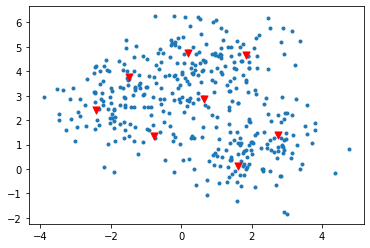

In [13]:
# df.to_numpy() Este método nos permite convertir un objeto a un arreglo numpy
plt.scatter(df.to_numpy()[:, 0], df.to_numpy()[:, 1], marker='.')
plt.scatter(k_means_model.cluster_centers_[:, 0], k_means_model.cluster_centers_[:, 1], marker='v', c='r', s=50)
plt.show()

## La curva del Codo (Elbow)

In [20]:
centers = range(1, 9)


In [21]:
"""
clusters = []
for posibility in posibilities:
    clusters.append(KMeans(n_clusters=posibility))
"""
clusters = [KMeans(n_clusters=center) for center in centers]

In [22]:
scores = [clusters[index].fit(df).score(df) for index in range(len(clusters))]

### Graficamos la curva de Elbow

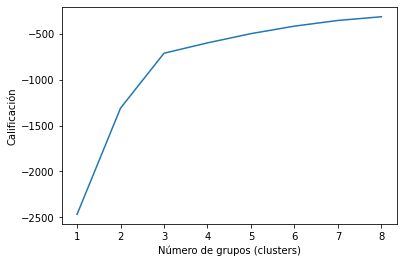

In [23]:
plt.plot(centers, scores)
plt.xlabel('Número de grupos (clusters)')
plt.ylabel('Calificación')
plt.show()

### Ahora que conocemos el número correcto de grupos, entrenamos el modelo

In [24]:
improved_k_means = KMeans(n_clusters=3)
improved_k_means.fit(df)

KMeans(n_clusters=3)

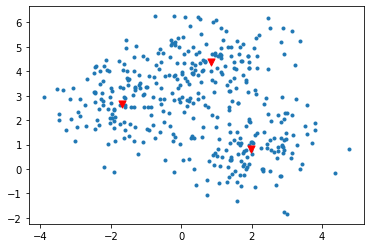

In [25]:
plt.scatter(df.to_numpy()[:, 0], df.to_numpy()[:, 1], marker='.')
plt.scatter(improved_k_means.cluster_centers_[:, 0], improved_k_means.cluster_centers_[:, 1], marker='v', c='r', s=50)
plt.show()

In [26]:
y

array([2, 2, 0, 0, 0, 1, 1, 2, 2, 1, 0, 2, 0, 2, 0, 0, 1, 1, 0, 1, 2, 2,
       0, 2, 2, 1, 2, 1, 0, 0, 1, 2, 0, 1, 2, 1, 0, 0, 1, 2, 1, 1, 1, 2,
       0, 0, 1, 1, 0, 2, 2, 0, 1, 0, 1, 0, 2, 0, 2, 1, 0, 1, 2, 1, 2, 2,
       2, 2, 0, 0, 1, 1, 2, 2, 0, 2, 1, 0, 1, 0, 0, 2, 1, 2, 1, 0, 2, 1,
       1, 0, 0, 1, 2, 2, 0, 0, 0, 2, 2, 0, 1, 1, 1, 2, 1, 0, 1, 1, 2, 1,
       1, 2, 2, 2, 1, 2, 0, 2, 2, 1, 1, 0, 1, 1, 0, 2, 1, 1, 1, 1, 2, 0,
       1, 2, 0, 2, 1, 0, 2, 2, 2, 1, 2, 0, 1, 0, 1, 1, 0, 1, 0, 2, 2, 0,
       2, 2, 1, 0, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 2, 1, 1, 2, 0, 1, 0, 2,
       0, 2, 0, 2, 1, 1, 0, 0, 1, 0, 0, 2, 1, 2, 2, 1, 1, 0, 0, 2, 0, 1,
       2, 0, 1, 2, 0, 2, 0, 0, 1, 1, 2, 0, 0, 2, 0, 2, 1, 0, 2, 2, 1, 1,
       1, 2, 0, 2, 0, 1, 0, 0, 2, 0, 1, 0, 1, 1, 0, 2, 0, 2, 1, 0, 2, 0,
       1, 1, 1, 1, 1, 0, 1, 2, 0, 1, 0, 2, 1, 0, 1, 2, 0, 1, 1, 1, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 1, 1, 2, 1, 1, 2, 2, 2, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 2, 2, 0,

In [27]:
improved_k_means.labels_

array([0, 0, 2, 2, 2, 1, 1, 0, 0, 1, 2, 0, 2, 0, 2, 2, 1, 1, 2, 1, 0, 0,
       2, 0, 0, 1, 0, 1, 2, 2, 1, 2, 2, 1, 0, 1, 2, 2, 1, 0, 0, 1, 1, 2,
       2, 2, 2, 1, 2, 0, 0, 2, 1, 0, 1, 2, 0, 2, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 2, 0, 1, 1, 0, 0, 2, 0, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 0, 1,
       1, 2, 2, 2, 0, 0, 2, 2, 2, 0, 0, 2, 1, 0, 1, 0, 1, 2, 1, 1, 0, 1,
       1, 0, 0, 0, 2, 2, 2, 0, 0, 1, 1, 2, 1, 1, 2, 0, 1, 2, 1, 1, 0, 2,
       1, 0, 0, 0, 1, 2, 2, 0, 2, 1, 0, 2, 1, 2, 1, 1, 2, 1, 2, 0, 0, 2,
       0, 0, 1, 2, 0, 2, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 2, 1, 2, 0,
       2, 1, 0, 0, 1, 1, 2, 2, 0, 2, 2, 0, 1, 0, 0, 1, 1, 2, 2, 0, 2, 1,
       0, 2, 1, 0, 2, 0, 2, 2, 1, 1, 0, 2, 2, 0, 2, 0, 1, 2, 0, 0, 1, 1,
       1, 0, 2, 0, 2, 1, 2, 2, 0, 2, 1, 2, 1, 1, 2, 0, 2, 0, 1, 1, 0, 2,
       2, 1, 1, 1, 1, 2, 1, 0, 2, 1, 2, 0, 1, 2, 1, 0, 2, 1, 1, 1, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 1, 1, 0, 1, 1, 0, 0, 0, 1, 2,
       2, 2, 1, 1, 2, 1, 1, 2, 1, 2, 2, 1, 0, 0, 2,

## Debemos dejar la información los más legible posible

In [28]:
df_labels = pd.DataFrame(improved_k_means.labels_)

In [31]:
df_labels[0].unique()

array([0, 2, 1])

In [35]:
improved_k_means.cluster_centers_

array([[-1.67037977,  2.67947776],
       [ 1.97866944,  0.82312532],
       [ 0.84299197,  4.3602611 ]])

In [36]:
labels = ['Clientes fidelizados','En proceso de fidelización', 'Clientes VIP']

In [37]:
predicted = improved_k_means.predict(df)

In [38]:
index = 0
for customer in predicted:
    print(f'El cliente #{index} pertenece al grupo: {labels[customer]}')
    index += 1

El cliente #0 pertenece al grupo: Clientes fidelizados
El cliente #1 pertenece al grupo: Clientes fidelizados
El cliente #2 pertenece al grupo: Clientes VIP
El cliente #3 pertenece al grupo: Clientes VIP
El cliente #4 pertenece al grupo: Clientes VIP
El cliente #5 pertenece al grupo: En proceso de fidelización
El cliente #6 pertenece al grupo: En proceso de fidelización
El cliente #7 pertenece al grupo: Clientes fidelizados
El cliente #8 pertenece al grupo: Clientes fidelizados
El cliente #9 pertenece al grupo: En proceso de fidelización
El cliente #10 pertenece al grupo: Clientes VIP
El cliente #11 pertenece al grupo: Clientes fidelizados
El cliente #12 pertenece al grupo: Clientes VIP
El cliente #13 pertenece al grupo: Clientes fidelizados
El cliente #14 pertenece al grupo: Clientes VIP
El cliente #15 pertenece al grupo: Clientes VIP
El cliente #16 pertenece al grupo: En proceso de fidelización
El cliente #17 pertenece al grupo: En proceso de fidelización
El cliente #18 pertenece al 